# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import model_selection
from sklearn.utils import shuffle

In [2]:
from utilities import visualize_feature_importances

# Load input data

In [6]:
from sklearn.datasets import fetch_california_housing

In [7]:
housing_data = fetch_california_housing() 

# Shuffle the data

In [8]:
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Split data into training and testing datasets 

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=7
)

# AdaBoost Regressor model

In [11]:
regressor = AdaBoostRegressor(
      DecisionTreeRegressor(max_depth=4)
    , n_estimators=400
    , random_state=7
)
regressor.fit(X_train, y_train)

,estimator,DecisionTreeR...r(max_depth=4)
,n_estimators,400
,learning_rate,1.0
,loss,'linear'
,random_state,7
,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


# Evaluate performance of AdaBoost regressor

In [12]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


ADABOOST REGRESSOR
Mean squared error = 1.18
Explained variance score = 0.47


# Extract feature importances

In [13]:
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

In [14]:
print("\nFeature importances:")
print(feature_importances)


Feature importances:
[0.20363419 0.06445947 0.09339504 0.04626802 0.10552586 0.13551963
 0.16211523 0.18908256]


In [15]:
print("\nFeature Names:")
print(feature_names)


Feature Names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


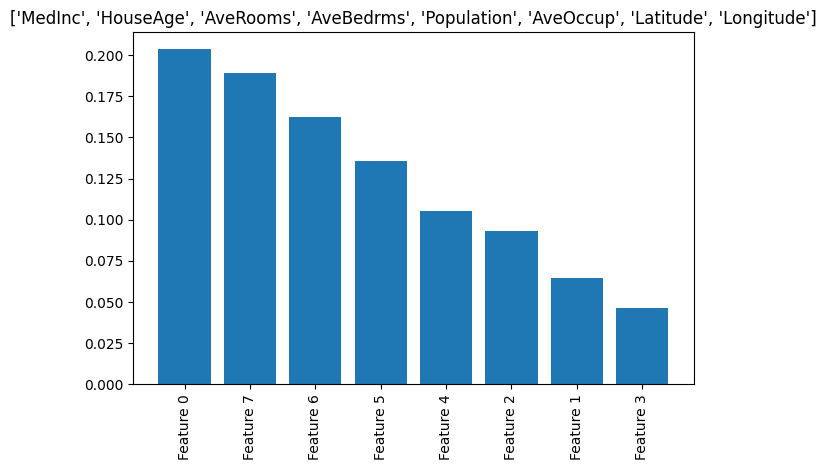

In [17]:
# visualize_feature_importances( feature_importances, feature_names,
#                                title="Feature importances of AdaBoost Regressor",
#                                xlabel="Feature importance", ylabel="Feature names",
#                                figsize=(10, 6), rotation=45)
visualize_feature_importances( feature_importances, feature_names)
plt.show()

# Normalize the importance values 

In [18]:
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Sort the values and flip them

In [19]:
index_sorted = np.flipud(np.argsort(feature_importances))

# Arrange the X ticks

In [20]:
pos = np.arange(index_sorted.shape[0]) + 0.5

# Plot the bar graph

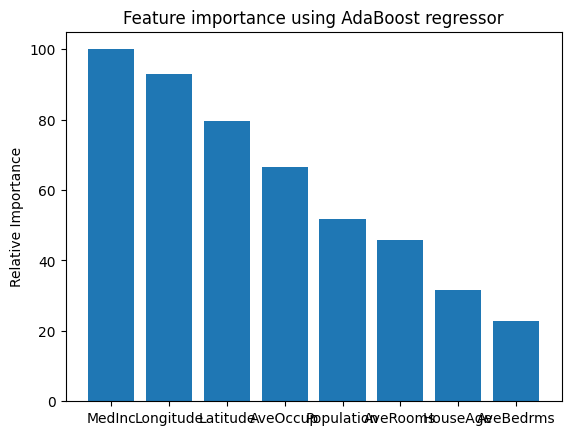

In [22]:
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, np.array(feature_names)[index_sorted]) # Incorrect: plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()